# Report Structure

We will work with a retail transactions dataset and apply two Market Basket Analysis algorithms to find frequent itemsets and, hence, derive the associated association rules. We will also include details about parameter selection and tradeoffs, model evaluation, and interpretation of any results and rules.

**The goal of this analysis will be to discover frequently co-purchased items and derive useful association rules from a dataset of retail transactions. This can help in improving product placement, bundling, and marketing strategies.**

# 1. Data Exploration and Exploratory Data Analysis (EDA)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [6]:
# import dataset
df = pd.read_csv("mba.csv")

In [7]:
df.head()

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(9835, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product 1   9835 non-null   object
 1   Product 2   7676 non-null   object
 2   Product 3   6033 non-null   object
 3   Product 4   4734 non-null   object
 4   Product 5   3729 non-null   object
 5   Product 6   2874 non-null   object
 6   Product 7   2229 non-null   object
 7   Product 8   1684 non-null   object
 8   Product 9   1246 non-null   object
 9   Product 10  896 non-null    object
 10  Product 11  650 non-null    object
 11  Product 12  468 non-null    object
 12  Product 13  351 non-null    object
 13  Product 14  273 non-null    object
 14  Product 15  196 non-null    object
 15  Product 16  141 non-null    object
 16  Product 17  95 non-null     object
 17  Product 18  66 non-null     object
 18  Product 19  52 non-null     object
 19  Product 20  38 non-null     object
 20  Product 

In [10]:
df.describe()

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


We are working with the mba.csv dataset, which appears to follow a transactional format where each row represents a customer's basket of up to 32 products (columns: "Product 1" to "Product 32"). 

I will reshape data to transaction format since the dataset has products listed in separate columns per row. I will convert it into a list of transactions

In [13]:
# Converting rows into a list of transactions
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

Then, I will perform One-Hot Encoding by converting the list of transactions into a one-hot encoded dataframe for algorithm input

In [15]:
!pip install mlxtend

In [16]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Now, I will apply Market Basket Algorithms, Apriori and FP-Growth to find frequent itemsets

**Apriori**

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_apriori = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

**FP-Growth**

In [21]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

**Parameter Selection & Tradeoffs**

Apriori

In [24]:
rules_apriori.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
441,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,1.0,0.007081,1.163866,0.743056,0.101434,0.140795,0.184302
436,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,1.0,0.007081,1.154078,0.745217,0.101434,0.133507,0.184302
421,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,1.0,0.007224,1.073242,0.781720,0.081340,0.068243,0.227152
420,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,1.0,0.007224,1.390354,0.717225,0.081340,0.280759,0.227152
538,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,1.0,0.007056,1.212206,0.725409,0.096899,0.175058,0.188018
543,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,1.0,0.007056,1.114697,0.747497,0.096899,0.102895,0.188018
493,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,1.0,0.008391,1.086776,0.765445,0.092791,0.079847,0.227825
492,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,1.0,0.008391,1.355705,0.707403,0.092791,0.262376,0.227825
4,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,1.0,0.011668,1.127366,0.753189,0.120677,0.112977,0.245455
5,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.0,0.011668,1.332628,0.708251,0.120677,0.249603,0.245455


FP growth

In [26]:
rules_fpgrowth.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
257,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,1.0,0.007081,1.163866,0.743056,0.101434,0.140795,0.184302
252,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,1.0,0.007081,1.154078,0.745217,0.101434,0.133507,0.184302
31,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,1.0,0.007224,1.073242,0.781720,0.081340,0.068243,0.227152
30,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,1.0,0.007224,1.390354,0.717225,0.081340,0.280759,0.227152
522,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,1.0,0.007056,1.212206,0.725409,0.096899,0.175058,0.188018
527,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,1.0,0.007056,1.114697,0.747497,0.096899,0.102895,0.188018
118,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,1.0,0.008391,1.355705,0.707403,0.092791,0.262376,0.227825
119,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,1.0,0.008391,1.086776,0.765445,0.092791,0.079847,0.227825
263,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,1.0,0.011668,1.332628,0.708251,0.120677,0.249603,0.245455
262,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,1.0,0.011668,1.127366,0.753189,0.120677,0.112977,0.245455


# 3. Interpretation 

We looked at the top rules from both Apriori and FP-Growth, ranked by lift, which shows how much more likely items are to appear together than expected if they were independent

For Apriori, rule 255 & 254 for example, the antecedent ('yogurt', 'whole milk') and consequent ('curd'), and lift = 3.37, means that **buying yogurt and whole milk increases the likelihood of buying curd by 3.37 times compared to chance**.

For FP-Growth, rule 30 & 31 for example, the antecedent of ('citrus fruit', 'other vegetables') and consequent of ('root vegetables'), and lift = 3.29, suggests that a **shopper who buys citrus fruit and other vegetables is 3.29 times more likely to also buy root vegetables**.

As observed, all top rules have lift > 3, which is strong and indicates strong associations. However, confidence is < 40%, meaning that while the association is strong, it doesn’t happen in the majority of cases. This is still useful for targeted marketing, but not blanket assumptions

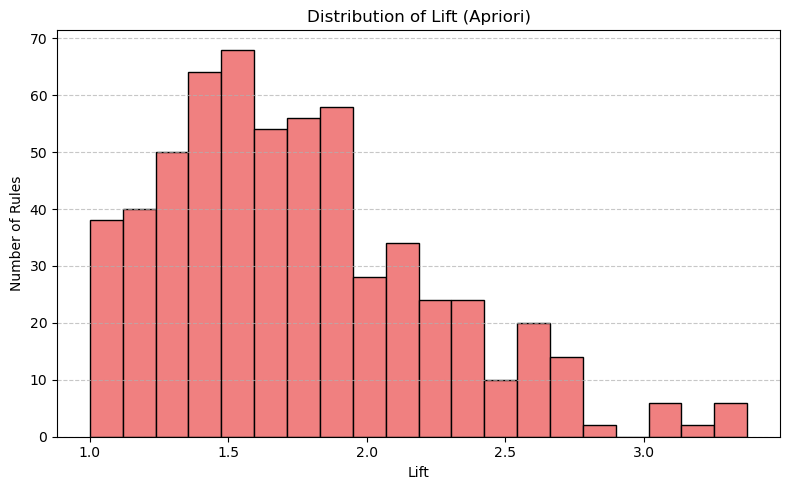

In [30]:
plt.figure(figsize=(8, 5))
plt.hist(rules_apriori['lift'], bins=20, color='lightcoral', edgecolor='black')
plt.title("Distribution of Lift (Apriori)")
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

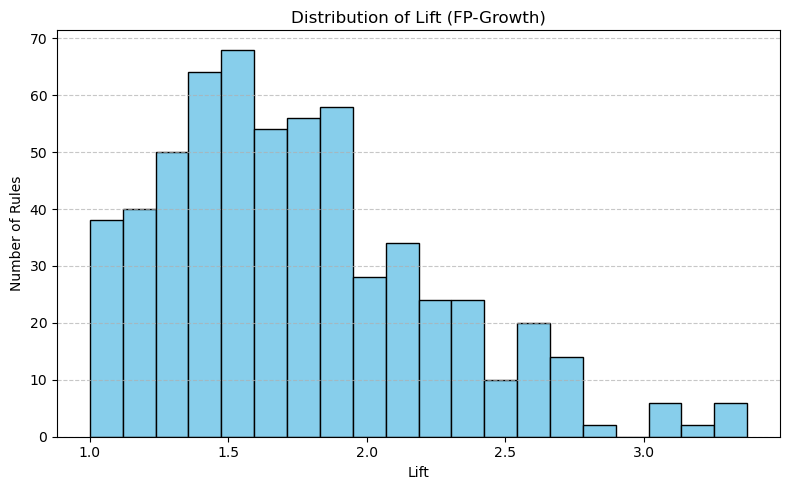

In [31]:
plt.figure(figsize=(8, 5))
plt.hist(rules_fpgrowth['lift'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Lift (FP-Growth)")
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Both plots (Apriori and FP-Growth) show the frequency of rules by lift value.

As observed, most rules have a lift between 1.0 and 2.0. Then, there's a sharp drop-off after 2.5, meaning very few ultra-strong associations. Also, a long tail exists up to around 3.3, suggesting that many product combinations offer mild-to-moderate association (lift ~1.5) while only a few are very strong and valuable for business strategy (lift > 3).

The shapes are very similar between Apriori and FP-Growth, confirming that both algorithms found consistent patterns, just with different efficiencies.

**Tradeoff Summary**

When Lift > 1, we see positive association (products are bought together more than chance)

When Lift > 2.5, we see strong signal, useful for recommendations, bundling, layout

When Confidence < 0.4, it means these patterns are not always true — but when they are, they’re meaningful

When Support ~1-2%, then these rules aren't super common, but they're statistically significant

**Recommendation**

Final recommendation would be to 1) use top lift rules to inform product placement (for exmple place yogurt, whole milk, and curd near each other). Also, 2) retailer could consider cross-promotions for items in strong rules with low support (like rare but valuable bundles). 3) Finally, FP-Growth algorithm is faster than Apriori and gave almost identical top rules, making it more scalable